# PM Fasal Beema Yojana

# Data Dictionary

* #### Year: Year in which the farmer joined the scheme.
* #### State: 
* #### sumInsured: This is the total value of the crop that is insured against potential losses.	
* #### premiumRate: 
* #### farmerShare : This is the percentage of the sum insured that the farmer (and potentially the government) needs to pay as a premium for the insurance coverage.
For example:
If the sumInsured is 37,500 rupees and the farmerShare is 2%, then the total premium(farmerShareValue) would be, 37500 * 0.02 = Rs. 750

* #### stateShare: This is the percentage of the sum insured that the state needs to pay as a premium for the insurance coverage.
For example:
If the sumInsured is 89,903 rupees and the stateShare is 3.5%, then the stateShareValue would be, 89903 * 0.035 = Rs. 3146.605

* #### goiShare: This is the percentage of the sum insured that the Government of India needs to pay as a premium for the insurance coverage.

* #### seasonCode:
* #### schemeCode:
* #### stateCode:
* #### startDate:
* #### endDate:
* #### isOpen:
* #### cnStarted: Commensement year started
* #### isPreviousSeasonYearInSubsidy: Yes/No
* #### firstGoiSubsidy: Yes/No
* #### ayTy: Agricultural year type
* #### categoryName: 14 categories
* #### cropType: 2 Types, 1.Agriculture 2. Horticulture and commercial
* #### unit:
* #### cropTypeCode: 
* #### indemnityLevel: Indemnity Level refers to the percentage of the sum insured that farmers are eligible to receive as compensation in case of crop loss due to insured perils.
Three Levels: Typically, there are three indemnity levels: 70%, 80%, and 90%. The specific level may vary depending on the crop and risk factors in a particular region.
Threshold Yield: The indemnity level is linked to the Threshold Yield (TY), which is the benchmark yield level set for a crop in an insurance unit.
Compensation: Farmers are eligible for compensation when the actual yield falls below the Threshold Yield. The amount of compensation is determined based on the extent of the yield shortfall and the applicable indemnity level.

Example:
If the Indemnity Level for a particular crop is 80% and the sum insured is ₹100,000, farmers can receive a maximum compensation of ₹80,000 in case of crop loss.
* ####  farmerShare:
* #### farmerShareValue:
* #### goiShareValue:
* #### stateShareValue:
* #### scheme:
* #### insuranceCompany.insuranceCompanyCode:
* #### insuranceCompany.insuranceCompanyName:

# Import the libraries

In [98]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import warnings

# Load Data

In [99]:
pmfby_df=pd.read_csv("D:\\ICT Academy\\PMFBY-Insurance-premium-prediction\\PMFBY_kaggle_data.csv")
pmfby_df.head(2) # Display top 2 rows of dataframe

,sssyName.year,sssyName.seasonName,sssyName.schemeName,sssyName.stateName,level3Name,cropName,sumInsured,premiumRate,stateShare,goiShare,...,insuranceCompanyName,cutOfDate,tollFreeNumber,headQuaterAddress,headQuaterEmail,websiteLink,sssyName.schemeNameShort,insuranceCompany.insuranceCompanyID,insuranceCompany.insuranceCompanyCode,insuranceCompany.insuranceCompanyName
0,2021,Kharif,Pradhan Mantri Fasal Bima Yojana,Goa,North Goa,Pulses,37500.0,2.0,0.0,0.0,...,FUTURE GENERALI INDIA INSURANCE CO. LTD.,2021-07-31 18:29:59,18002664141,"Indiabulls Finance Centre, 6th Floor, Tower 3,...",fgcare@futuregenerali.in,https://general.futuregenerali.in/,PMFBY,D19CD684-BCCB-4575-BC6B-0687572B0D3F,1005,FUTURE GENERALI INDIA INSURANCE CO. LTD.
1,2021,Kharif,Pradhan Mantri Fasal Bima Yojana,Goa,North Goa,Groundnut (Pea Nut),47500.0,2.0,0.0,0.0,...,FUTURE GENERALI INDIA INSURANCE CO. LTD.,2021-07-31 18:29:59,18002664141,"Indiabulls Finance Centre, 6th Floor, Tower 3,...",fgcare@futuregenerali.in,https://general.futuregenerali.in/,PMFBY,D19CD684-BCCB-4575-BC6B-0687572B0D3F,1005,FUTURE GENERALI INDIA INSURANCE CO. LTD.


# Print number of rows and columns

In [100]:
print('Number of rows:',pmfby_df.shape[0])
print('Number of columns:',pmfby_df.shape[1])

Number of rows: 29999
Number of columns: 62


# Print summary statistics of the dataframe

In [101]:
pmfby_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sssyName.year                          29999 non-null  int64  
 1   sssyName.seasonName                    29999 non-null  object 
 2   sssyName.schemeName                    29999 non-null  object 
 3   sssyName.stateName                     29999 non-null  object 
 4   level3Name                             29999 non-null  object 
 5   cropName                               29999 non-null  object 
 6   sumInsured                             29999 non-null  float64
 7   premiumRate                            29999 non-null  float64
 8   stateShare                             29999 non-null  float64
 9   goiShare                               29999 non-null  float64
 10  sssyID                                 29999 non-null  int64  
 11  se

# Removing columns (because it was either irrelevant or duplicate data)

In [102]:
pmfby_new = pmfby_df.drop(['sssyName.seasonName', 'sssyName.schemeName', 'level3Name','cropName', 'sssyID', 'seasonID','schemeID','schemeCode', 'stateID', 'year','policyStartDate', 'policyEndDate', 'cnIsCopied','policy', 'notification','isOfflineChallan','goiOfflineChallan','stateOfflineChallan','yieldEndDate','currentTime','default','level3ID','level3','level3Code','cropID','cropCode','pickingType','type','insuranceCompanyName','insuranceCompany.insuranceCompanyCode','cutOfDate','stateCode','tollFreeNumber','headQuaterAddress','headQuaterEmail','websiteLink','insuranceCompany.insuranceCompanyID','isOpen','cnStarted','unit','ayTy'],axis=1)

In [103]:
pmfby_new.head(2) # Display top 2 rows of dataset

,sssyName.year,sssyName.stateName,sumInsured,premiumRate,stateShare,goiShare,seasonCode,startDate,endDate,isPreviousSeasonYearInSubsidy,...,categoryName,cropType,cropTypeCode,indemnityLevel,farmerShare,farmerShareValue,goiShareValue,stateShareValue,sssyName.schemeNameShort,insuranceCompany.insuranceCompanyName
0,2021,Goa,37500.0,2.0,0.0,0.0,1,2020-07-06,2030-11-24 13:45:49,True,...,Pulses,Agriculture,1,80,2.0,750.0,0.0,0.0,PMFBY,FUTURE GENERALI INDIA INSURANCE CO. LTD.
1,2021,Goa,47500.0,2.0,0.0,0.0,1,2020-07-06,2030-11-24 13:45:49,True,...,Oilseeds,Agriculture,1,80,2.0,950.0,0.0,0.0,PMFBY,FUTURE GENERALI INDIA INSURANCE CO. LTD.


# Rename columns for better understanding of dataframe

In [104]:
pmfby_renamed_cols = pmfby_new.rename(columns={'sssyName.year': 'Year','sssyName.stateName':'State','sssyName.schemeNameShort':'Scheme','insuranceCompany.insuranceCompanyName':'insuranceCompanyName'})

# Removing WBCIS (Weather based Crop Insurance Scheme) data rows.

In [105]:
pmfby_new = pmfby_renamed_cols[pmfby_renamed_cols['Scheme'] != 'WBCIS'] 

# Removing scheme column

In [106]:
pmfby_new = pmfby_new.drop(['Scheme'],axis=1)

# Check for missing values

In [107]:
pmfby_new.isnull().sum()

Year                             0
State                            0
sumInsured                       0
premiumRate                      0
stateShare                       0
goiShare                         0
seasonCode                       0
startDate                        0
endDate                          0
isPreviousSeasonYearInSubsidy    0
firstGoiSubsidy                  0
categoryName                     0
cropType                         0
cropTypeCode                     0
indemnityLevel                   0
farmerShare                      0
farmerShareValue                 0
goiShareValue                    0
stateShareValue                  0
insuranceCompanyName             0
dtype: int64

#### There are no missing values

# Rearrange columns for better understanding of dataframe

In [108]:
pmfby_rearranged= pmfby_new[['Year','State','sumInsured','premiumRate','farmerShare','farmerShareValue','stateShare','stateShareValue','goiShare','goiShareValue','indemnityLevel','seasonCode','isPreviousSeasonYearInSubsidy','firstGoiSubsidy','categoryName','cropTypeCode','startDate','endDate','insuranceCompanyName']]

In [109]:
pmfby_rearranged.head(2) # Display top 2 rows of dataframe

,Year,State,sumInsured,premiumRate,farmerShare,farmerShareValue,stateShare,stateShareValue,goiShare,goiShareValue,indemnityLevel,seasonCode,isPreviousSeasonYearInSubsidy,firstGoiSubsidy,categoryName,cropTypeCode,startDate,endDate,insuranceCompanyName
0,2021,Goa,37500.0,2.0,2.0,750.0,0.0,0.0,0.0,0.0,80,1,True,False,Pulses,1,2020-07-06,2030-11-24 13:45:49,FUTURE GENERALI INDIA INSURANCE CO. LTD.
1,2021,Goa,47500.0,2.0,2.0,950.0,0.0,0.0,0.0,0.0,80,1,True,False,Oilseeds,1,2020-07-06,2030-11-24 13:45:49,FUTURE GENERALI INDIA INSURANCE CO. LTD.


# Print number of rows and columns of rearranged data

In [110]:
print('Number of rows:',pmfby_rearranged.shape[0])
print('Number of columns:',pmfby_rearranged.shape[1])

Number of rows: 20495
Number of columns: 19


# Print summary statistics of the rearranged dataframe

In [111]:
pmfby_rearranged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20495 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           20495 non-null  int64  
 1   State                          20495 non-null  object 
 2   sumInsured                     20495 non-null  float64
 3   premiumRate                    20495 non-null  float64
 4   farmerShare                    20495 non-null  float64
 5   farmerShareValue               20495 non-null  float64
 6   stateShare                     20495 non-null  float64
 7   stateShareValue                20495 non-null  float64
 8   goiShare                       20495 non-null  float64
 9   goiShareValue                  20495 non-null  float64
 10  indemnityLevel                 20495 non-null  int64  
 11  seasonCode                     20495 non-null  int64  
 12  isPreviousSeasonYearInSubsidy  20495 non-null  bool

#Category_cols=['State','Scheme','schemeCode','isPreviousSeasonYearInSubsidy','firstGoiSubsidy','seasonCode','categoryName','cropTypeCode','startDate','endDate','insuranceCompanyName',,'indemnityLevel']
#Numerical_cols=['sumInsured','premiumRate','farmerShare','farmerShareValue','stateShare','stateShareValue','goiShare','goiShareValue']

# Save the rearranged dataframe as .csv file.

In [112]:
#pmfby_rearranged.to_csv('Modified_pmfby_data.csv', index=False)
# import os
# os.getcwd() Show current working directory

# Check for duplicate columns

In [113]:
print("No.of duplicate columns in data:",pmfby_rearranged.columns.duplicated().sum())

No.of duplicate columns in data: 0


# Check for duplicate rows

In [114]:
print("No.of duplicate rows in data:",pmfby_rearranged.duplicated().sum())

No.of duplicate rows in data: 2713


# Remove duplicate rows

In [115]:
pmfby_no_duplicates = pmfby_rearranged.drop_duplicates()
#pmfby_no_duplicates.tail(2)

# Print number of rows and columns

In [116]:
print('Number of rows:',pmfby_no_duplicates.shape[0])
print('Number of columns:',pmfby_no_duplicates.shape[1])

Number of rows: 17782
Number of columns: 19


# Save the duplicate removed dataframe as .csv file.

In [117]:
# pmfby_no_duplicates.to_csv('PMFBY_Duplicate_removed.csv', index=False)
# import os
# os.getcwd() Show current working directory

In [118]:
pmfby_no_duplicates.endDate

0        2030-11-24 13:45:49
1        2030-11-24 13:45:49
2        2030-11-24 13:45:49
3        2030-11-24 13:45:49
4        2030-11-24 13:45:49
                ...         
29993    2030-11-24 13:45:49
29994    2030-11-24 13:45:49
29996    2030-11-24 13:45:49
29997    2030-11-24 13:45:49
29998    2030-11-24 13:45:49
Name: endDate, Length: 17782, dtype: object

# Creating an additional column 'Policy Term'.
#### (period during which the policyholder is covered by the insurance policy).

In [119]:
def calculate_duration(df):
    """
    Calculates the duration in days between 'startDate' and 'endDate' 
    and adds a new column 'Policy Term' to the DataFrame.
    """
    # Convert 'startDate' and 'endDate' to datetime objects, handling errors
    df['startDate'] = pd.to_datetime(df['startDate'], format='%Y-%m-%d', errors='coerce')
    df['endDate'] = pd.to_datetime(df['endDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


    # Calculate duration in days
    df['Policy Term (Days)'] = (df['endDate'] - df['startDate']).dt.days

    return df

# Calculate and add duration column
pmfby_no_duplicates = calculate_duration(pmfby_no_duplicates.copy())

# View the Policy Term column
pmfby_no_duplicates[['Policy Term (Days)']]


,Policy Term (Days)
0,3793
1,3793
2,3159
3,4710
4,4710
...,...
29993,3370
29994,3370
29996,3370
29997,3370


# Dropping 'startDate' and 'endDate' columns

In [120]:
pmfby_no_duplicates= pmfby_no_duplicates.drop(['startDate','endDate'],axis=1)


# Display basic information about data

In [121]:
pmfby_no_duplicates.describe()

,Year,sumInsured,premiumRate,farmerShare,farmerShareValue,stateShare,stateShareValue,goiShare,goiShareValue,indemnityLevel,seasonCode,cropTypeCode,Policy Term (Days)
count,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.00000,17782.000000
mean,2019.829266,51809.365476,12.139860,2.232471,1343.243597,5.138755,2295.904951,4.760400,2093.586496,80.367225,1.484704,1.19531,4102.194691
std,1.425022,40410.610061,9.596728,1.205719,1860.889097,5.422946,3611.271275,4.266489,2594.241194,7.173922,0.499780,0.39645,610.176236
min,2018.000000,1.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.000000,1.00000,3159.000000
25%,2019.000000,28000.000000,5.000000,1.500000,465.000000,1.250000,435.249375,1.365000,475.825925,80.000000,1.000000,1.00000,3370.000000
50%,2020.000000,40035.000000,10.000000,2.000000,705.000000,3.725000,1361.517500,3.750000,1369.900000,80.000000,1.000000,1.00000,3838.000000
75%,2021.000000,62500.000000,17.000000,2.000000,1218.015000,7.462500,2832.687500,7.425000,2792.725000,90.000000,2.000000,1.00000,4710.000000
max,2022.000000,620100.000000,68.400000,5.000000,16122.600000,54.900000,91782.315000,31.220000,31382.290000,90.000000,2.000000,2.00000,4710.000000


#### Sum Insured:

* Mean: Rs.51809, with a std of 40410, indicating high variability in insured amounts.
* Range: Values vary significantly from ₹1 to ₹620100.

#### Premium Rate:

* Mean: 12.139860%, with a std of 9.596728%, indicating significant variation in premium rates.
* Range: Very low minimum rate of 0.15%, reaching up to 68.40%.

#### Farmer Share and Farmer Share Value:

* Farmer Share: Mean is 2.23%, ranging from 0% to 5%.
* Farmer Share Value: Mean value of ₹1343, ranging widely from ₹0 to ₹16122.
* Implication: Subsidies likely make insurance affordable, with some cases indicating no farmer contribution.

### Indemnity Level:

* Mean: 80%, suggesting high coverage levels.
* Range: 70% to 90%. 

# Display count of each category in categorical columns

#### Convert all state names to lower case, remove spacing and symbols

In [122]:
# Function to standardize state names
def standardize_state(state):
    return state.lower().strip().replace(" ", "").replace("&", "") #Convert state names to lower case, remove spaces and '&' character.
    
# Apply the function to the 'state' column
pmfby_no_duplicates.loc[:,'State'] = pmfby_no_duplicates['State'].apply(standardize_state)

#### Display the count of unique values in the column 'State' 

In [123]:
# Display the occurance of unique values in the column 'State' 
state_counts=pmfby_no_duplicates['State'].value_counts()
state_counts

State
tamilnadu                2979
uttarpradesh             2906
madhyapradesh            2252
rajasthan                1941
maharashtra              1603
odisha                   1241
chhattisgarh              874
haryana                   700
gujarat                   657
assam                     403
andhrapradesh             337
jharkhand                 288
telangana                 284
uttarakhand               215
kerala                    209
westbengal                190
himachalpradesh           157
sikkim                    110
meghalaya                 105
tripura                    93
puducherry                 82
goa                        62
jammuandkashmir            50
manipur                    24
andamannicobarislands      20
Name: count, dtype: int64

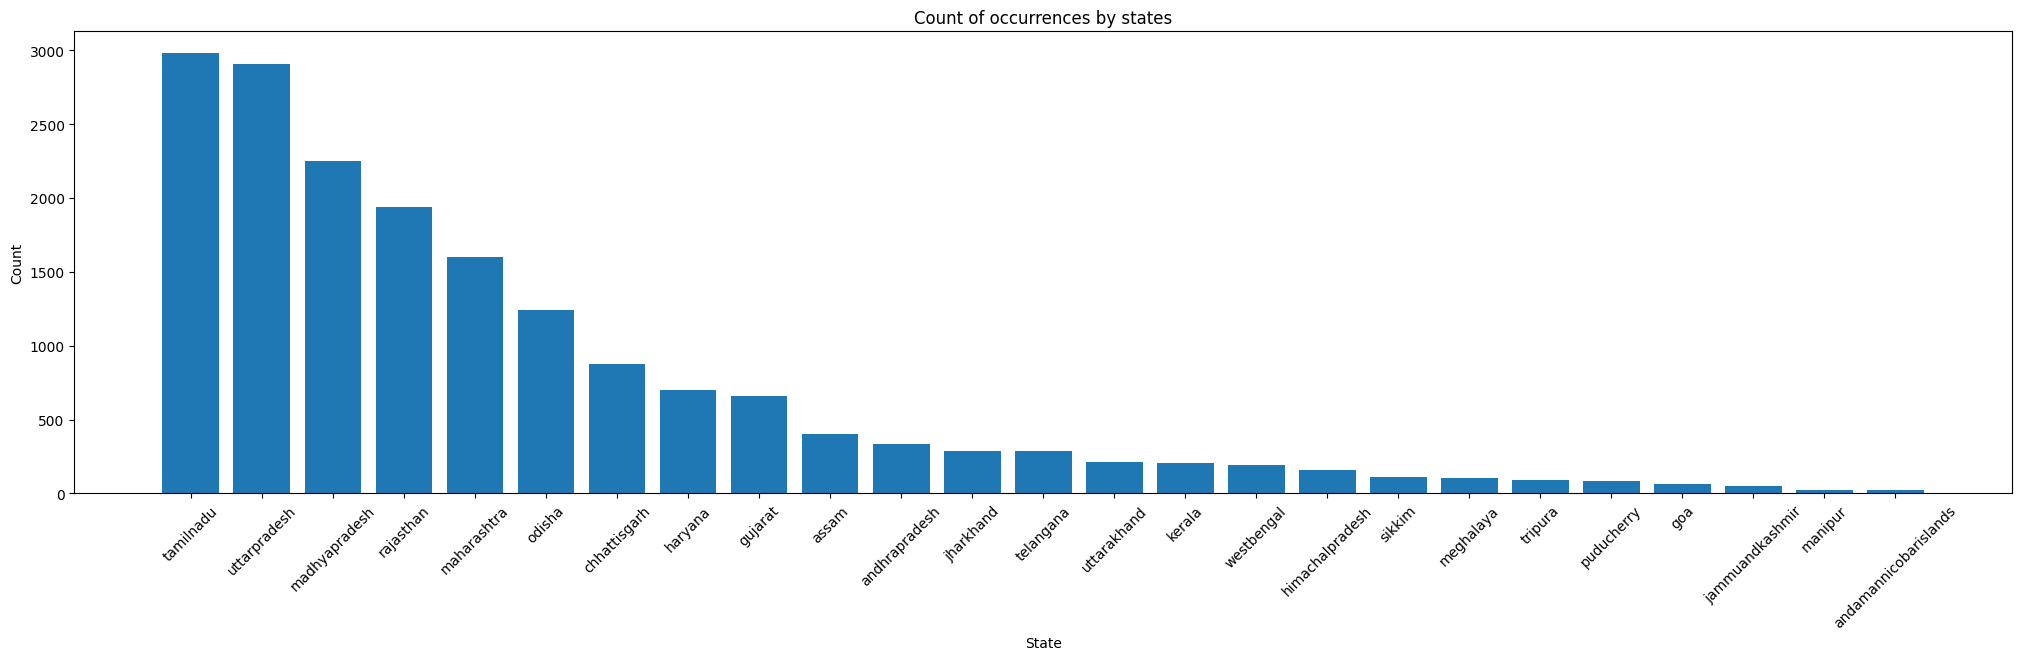

In [124]:
# Create a bar graph for the same
plt.figure(figsize=(25, 6))  # To adjust figure size as needed
plt.bar(state_counts.index, state_counts)
plt.xlabel('State') # X axis label
plt.ylabel('Count') # Y axis label
plt.title('Count of occurrences by states')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* #### Class Imbalance: Out of 17782 rows, 2906 rows shows data related to UP while some states have less than 100 entries. This can lead to bias in the model.

#Category_cols=['State','isPreviousSeasonYearInSubsidy','firstGoiSubsidy','seasonCode','categoryName','cropTypeCode','startDate','endDate','insuranceCompanyName','indemnityLevel']
#Numerical_cols=['sumInsured','premiumRate','farmerShare','farmerShareValue','stateShare','stateShareValue','goiShare','goiShareValue']

#### Display the count of unique values in the column 'isPreviousSeasonYearInSubsidy' 

In [125]:
subsidy_unique_counts=pmfby_no_duplicates['isPreviousSeasonYearInSubsidy'].value_counts()
subsidy_unique_counts

isPreviousSeasonYearInSubsidy
False    11435
True      6347
Name: count, dtype: int64

<Axes: xlabel='isPreviousSeasonYearInSubsidy', ylabel='count'>

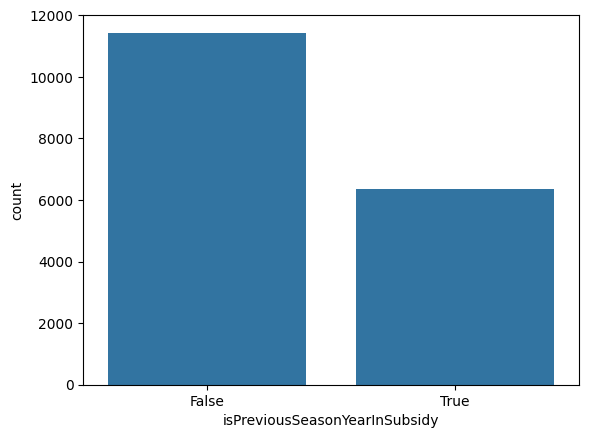

In [126]:
sns.countplot(data=pmfby_no_duplicates, x="isPreviousSeasonYearInSubsidy")

#### Display the count of unique values in the column 'firstGoiSubsidy' 

In [127]:
firstGoiSubsidy_unique_counts=pmfby_no_duplicates['firstGoiSubsidy'].value_counts()
firstGoiSubsidy_unique_counts

firstGoiSubsidy
True     14548
False     3234
Name: count, dtype: int64

#### Display the count of unique values in the column 'seasonCode' 

In [128]:
# Display the occurance of unique values in the column 'seasonCode' 
season_unique_counts=pmfby_no_duplicates['seasonCode'].value_counts()
season_unique_counts

seasonCode
1    9163
2    8619
Name: count, dtype: int64

<Axes: xlabel='seasonCode', ylabel='count'>

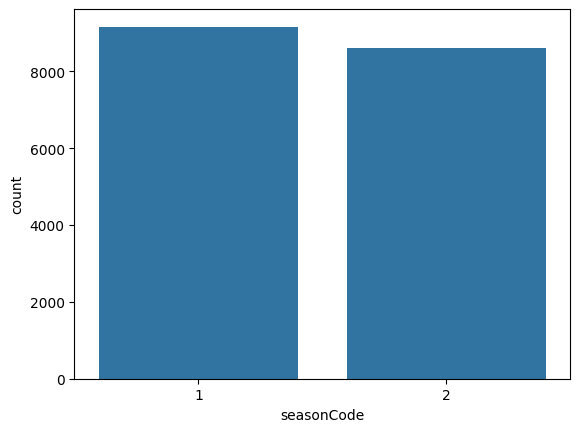

In [129]:
sns.countplot(data=pmfby_no_duplicates, x="seasonCode")

#### Display the count of unique values in the column 'categoryName' 

In [130]:
# Display the occurance of unique values in the column 'categoryName' 
categoryName_unique_counts=pmfby_no_duplicates['categoryName'].value_counts()
categoryName_unique_counts

categoryName
Cereals                          4267
Pulses                           3797
Oilseeds                         3262
Millets                          2841
Vegetables                       1317
Fiber Crops                       719
Sugar and Starch Crops            553
Fruits                            438
Condiments and Spices             397
Fodder Crops                      126
Medicinal and Aromatic Plants      65
Name: count, dtype: int64

#### Display the count of unique values in the column 'categoryName' 

In [131]:
# Display the occurance of unique values in the column 'cropTypeCode' 
cropTypeCode_unique_counts=pmfby_no_duplicates['cropTypeCode'].value_counts()
cropTypeCode_unique_counts

cropTypeCode
1    14309
2     3473
Name: count, dtype: int64

<Axes: xlabel='cropTypeCode', ylabel='count'>

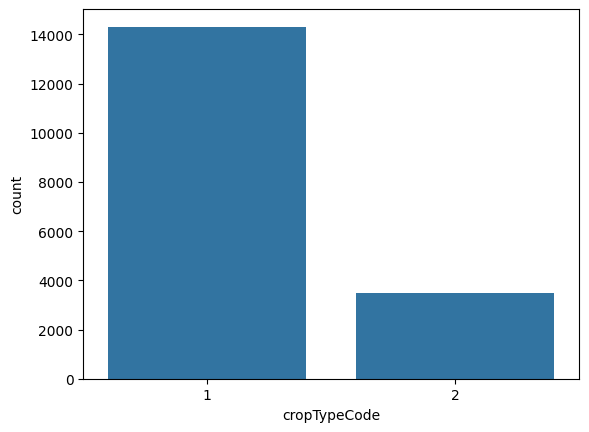

In [132]:
sns.countplot(data=pmfby_no_duplicates, x="cropTypeCode")

#### Display the count of unique values in the column 'insuranceCompanyName' 

In [133]:
# Display the occurance of unique values in the column 'insuranceCompanyName' 
insuranceCompanyName_unique_counts = pmfby_no_duplicates['insuranceCompanyName'].value_counts()
insuranceCompanyName_unique_counts

insuranceCompanyName
AGRICULTURE INSURANCE COMPANY                         7062
HDFC ERGO GENERAL INSURANCE CO. LTD.                  1740
RELIANCE GENERAL INSURANCE CO. LTD.                   1300
UNIVERSAL SOMPO GENERAL INSURANCE COMPANY             1256
BAJAJ ALLIANZ GENERAL INSURANCE CO. LTD               1244
IFFCO TOKIO GENERAL INSURANCE CO. LTD.                1048
ORIENTAL INSURANCE                                     861
SBI GENERAL INSURANCE                                  701
NATIONAL INSURANCE COMPANY LIMITED                     368
NEW INDIA ASSURANCE COMPANY                            359
BHARTI AXA GENERAL INSURANCE COMPANY LTD.              347
CHOLAMANDALAM MS GENERAL INSURANCE COMPANY LIMITED     286
FUTURE GENERALI INDIA INSURANCE CO. LTD.               258
UNITED INDIA INSURANCE CO.                             252
ICICI LOMBARD GENERAL INSURANCE CO. LTD.               235
ROYAL SUNDARAM GENERAL INSURANCE CO. LIMITED           233
TATA AIG GENERAL INSURANCE CO. LTD.

#### Display the count of unique values in the column 'indemnityLevel' 

In [134]:
# Display the occurance of unique values in the column 'indemnityLevel' 
indemnityLevel_unique_counts = pmfby_no_duplicates['indemnityLevel'].value_counts()
indemnityLevel_unique_counts

indemnityLevel
80    8607
90    4914
70    4261
Name: count, dtype: int64

<Axes: xlabel='indemnityLevel', ylabel='count'>

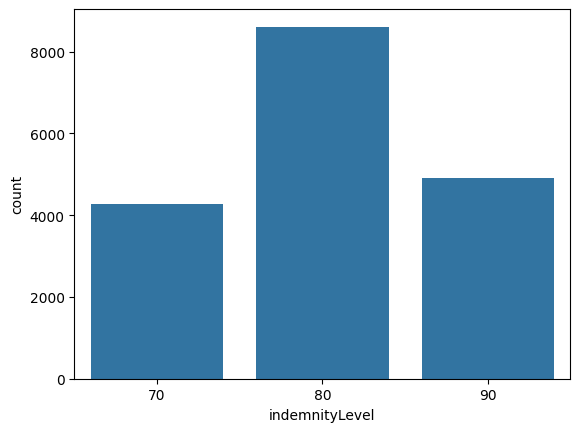

In [135]:
sns.countplot(data=pmfby_no_duplicates, x="indemnityLevel")

#### Display the count of unique values in the column 'premiumRate' 

In [136]:
# Display the occurance of unique values in the column 'premiumRate' 
premiumRate_unique_counts = pmfby_no_duplicates['premiumRate'].value_counts()
premiumRate_unique_counts

premiumRate
5.0000     1139
10.0000     884
15.0000     729
2.0000      715
8.0000      599
           ... 
22.4800       1
27.8000       1
10.4590       1
4.4628        1
0.7400        1
Name: count, Length: 2044, dtype: int64

In [137]:
# plt.figure(figsize=(24,6))
# sns.countplot(data=pmfby_no_duplicates, x="premiumRate")
# plt.show()

#### Display the count of unique values in the column 'farmerShare' 

In [138]:
# Display the occurance of unique values in the column 'farmerShare' 
farmerShare_unique_counts = pmfby_no_duplicates['farmerShare'].value_counts()
farmerShare_unique_counts

farmerShare
2.00    7638
1.50    6361
5.00    2474
1.00     294
0.00     215
        ... 
0.64       1
0.55       1
4.37       1
1.21       1
2.44       1
Name: count, Length: 204, dtype: int64

In [139]:
#sns.countplot(data=pmfby_no_duplicates, x="farmerShare")

#### Display the count of unique values in the column 'stateShare' 

In [140]:
# Display the occurance of unique values in the column 'stateShare' 
stateShare_unique_counts = pmfby_no_duplicates['stateShare'].value_counts()
stateShare_unique_counts

stateShare
0.0000     1932
1.7500      518
1.5000      517
4.0000      424
6.5000      379
           ... 
0.0150        1
10.2400       1
2.5600        1
5.7295        1
1.2314        1
Name: count, Length: 2199, dtype: int64

In [141]:
#sns.countplot(data=pmfby_no_duplicates, x="stateShare")

#### Display the count of unique values in the column 'goiShare' 

In [142]:
# Display the occurance of unique values in the column 'goiShare' 
goiShare_unique_counts = pmfby_no_duplicates['goiShare'].value_counts()
goiShare_unique_counts

goiShare
0.0000     1958
1.5000      518
1.7500      516
10.0000     480
4.0000      427
           ... 
4.0200        1
2.2941        1
1.2314        1
2.7295        1
6.4673        1
Name: count, Length: 1880, dtype: int64

In [143]:
#sns.countplot(data=pmfby_no_duplicates, x="goiShare")

#### Display the count of unique values in the column 'Policy Term' 

In [144]:
# Display the occurance of unique values in the column 'Policy Term' 
# Policy_Term_unique_counts = pmfby_no_duplicates['Policy Term'].value_counts()
# Policy_Term_unique_counts

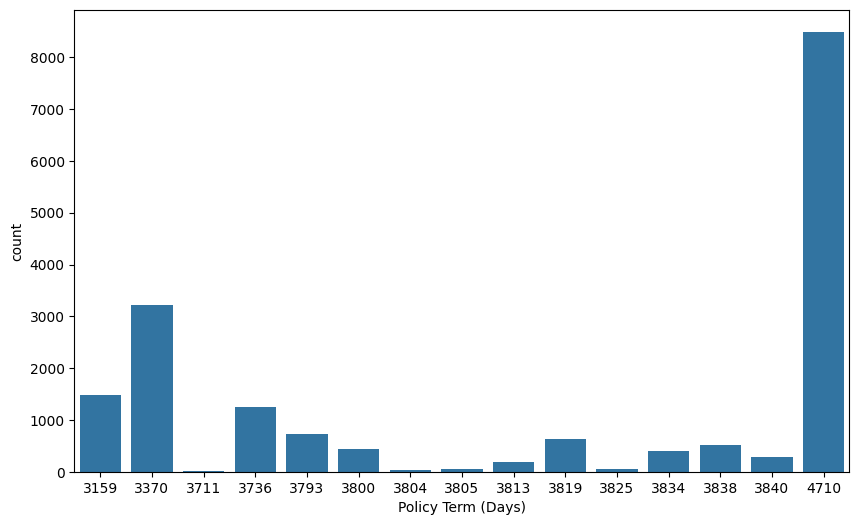

In [146]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=pmfby_no_duplicates, x="Policy Term (Days)")
plt.show()

# Histogram of numerical columns

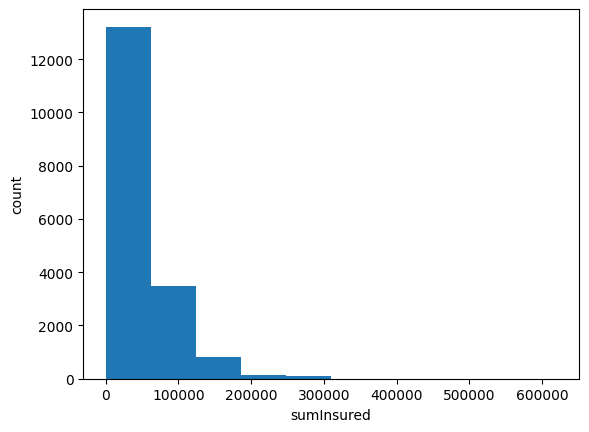

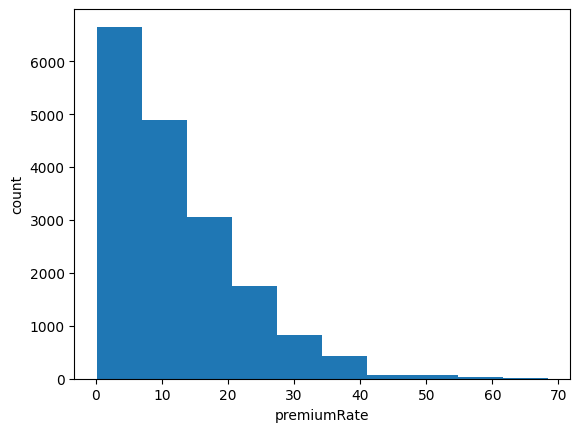

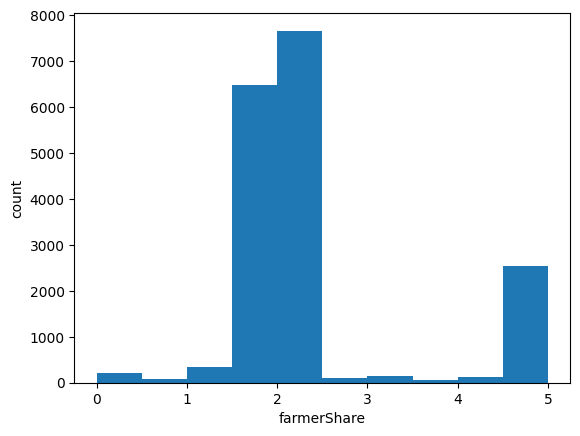

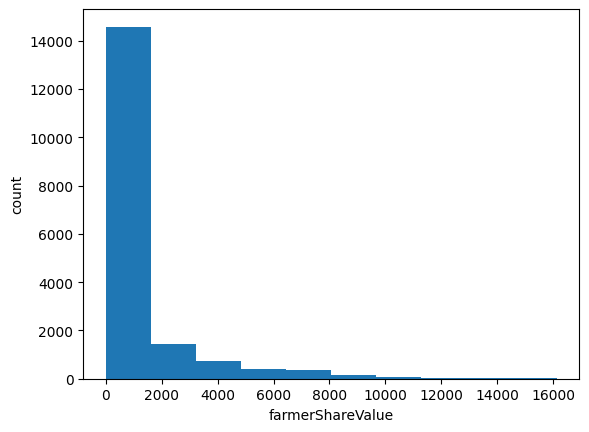

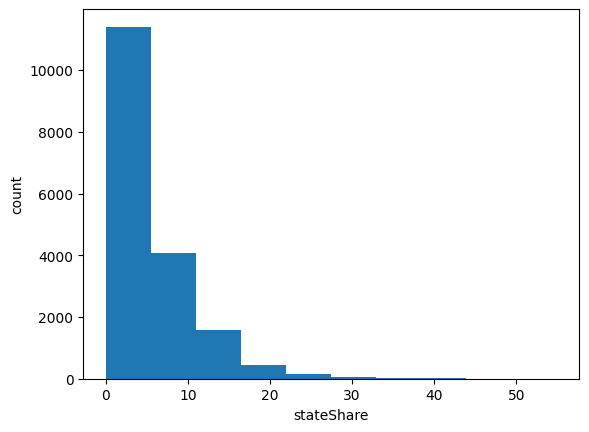

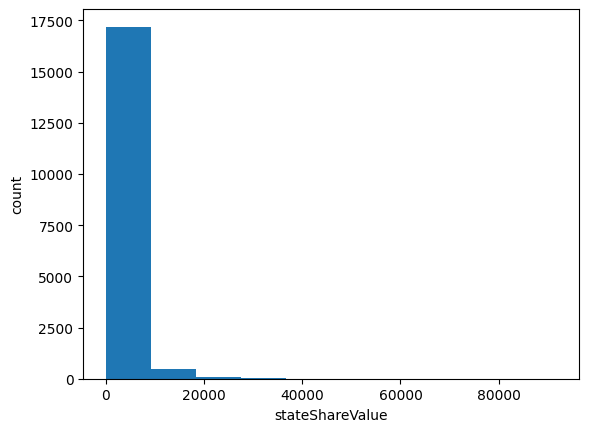

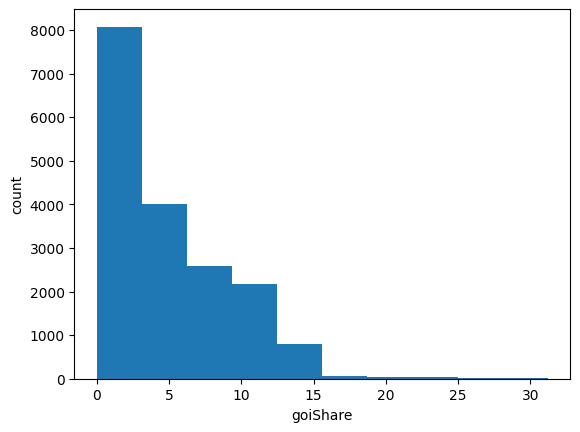

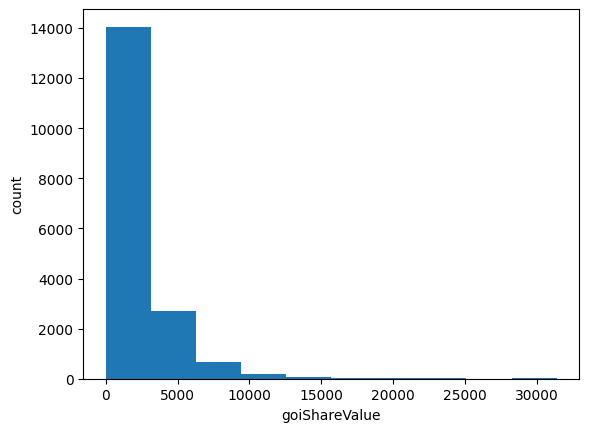

In [147]:
Numerical_cols=['sumInsured','premiumRate','farmerShare','farmerShareValue','stateShare','stateShareValue','goiShare','goiShareValue']
# Create a histogram of numerical columns
for col in Numerical_cols:
    plt.hist(pmfby_no_duplicates[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

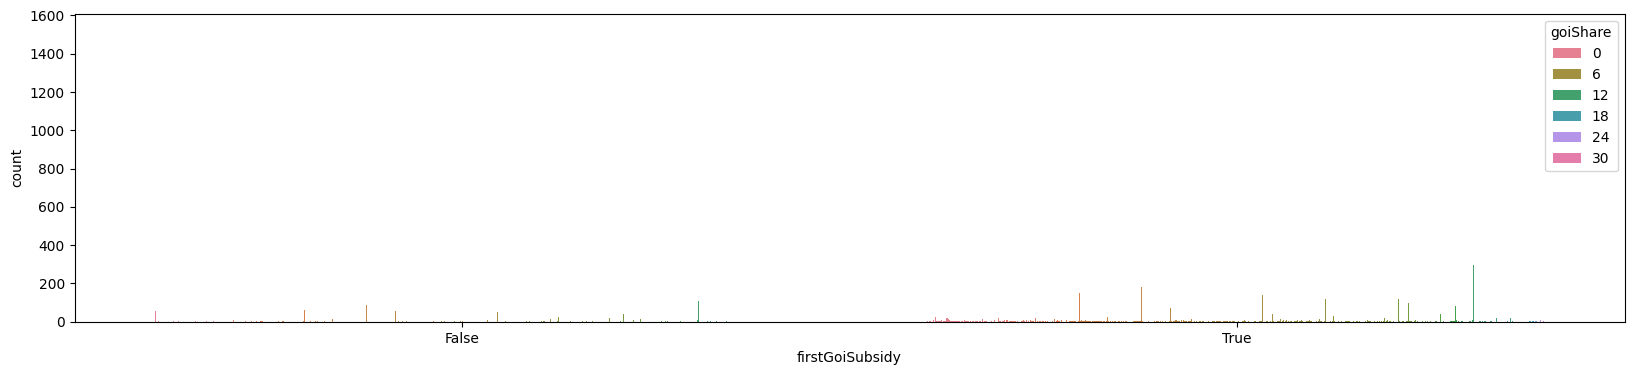

In [148]:
plt.figure(figsize=(20,4))
sns.countplot(data=pmfby_no_duplicates, x="firstGoiSubsidy",hue="goiShare", palette='husl')
plt.show()

# Checking correlation of numerical columns

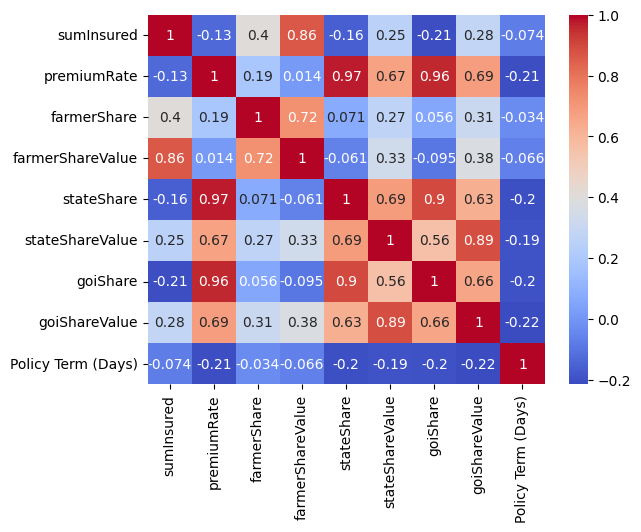

In [149]:
Numerical_cols=['sumInsured','premiumRate','farmerShare','farmerShareValue','stateShare','stateShareValue','goiShare','goiShareValue','Policy Term (Days)']
sns.heatmap(pmfby_no_duplicates[Numerical_cols].corr(), annot=True,cmap='coolwarm') 
plt.show()

Text(0.5, 1.0, 'sumInsured Vs farmerShareValue')

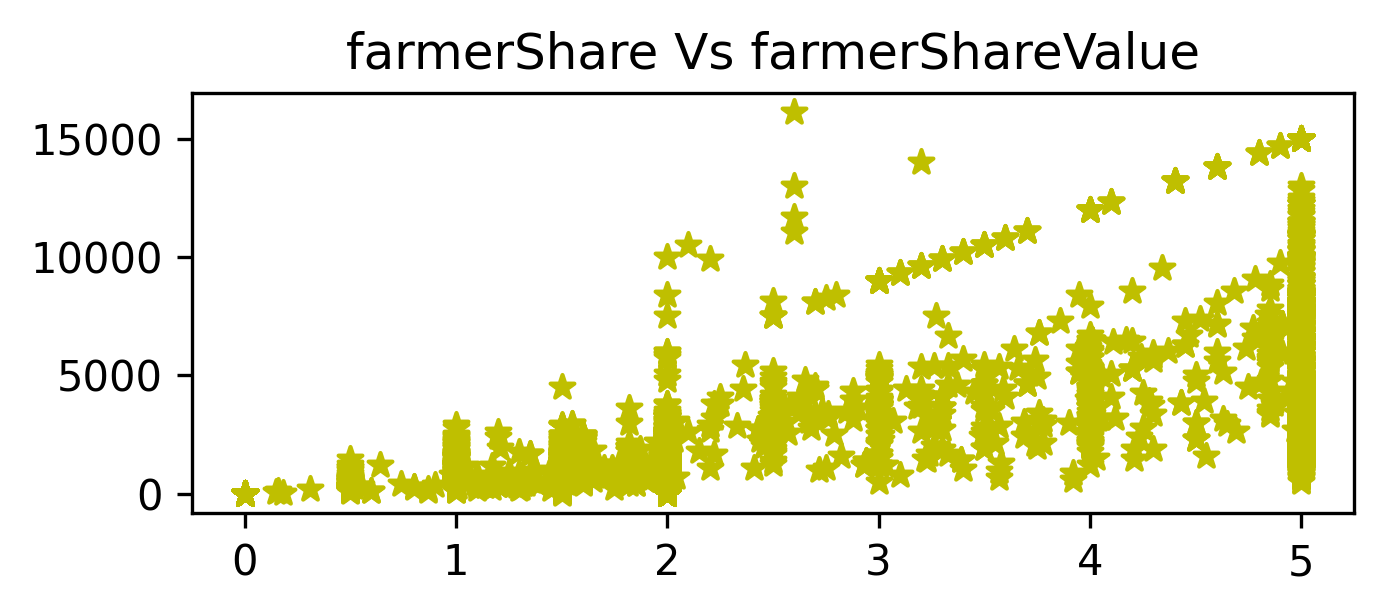

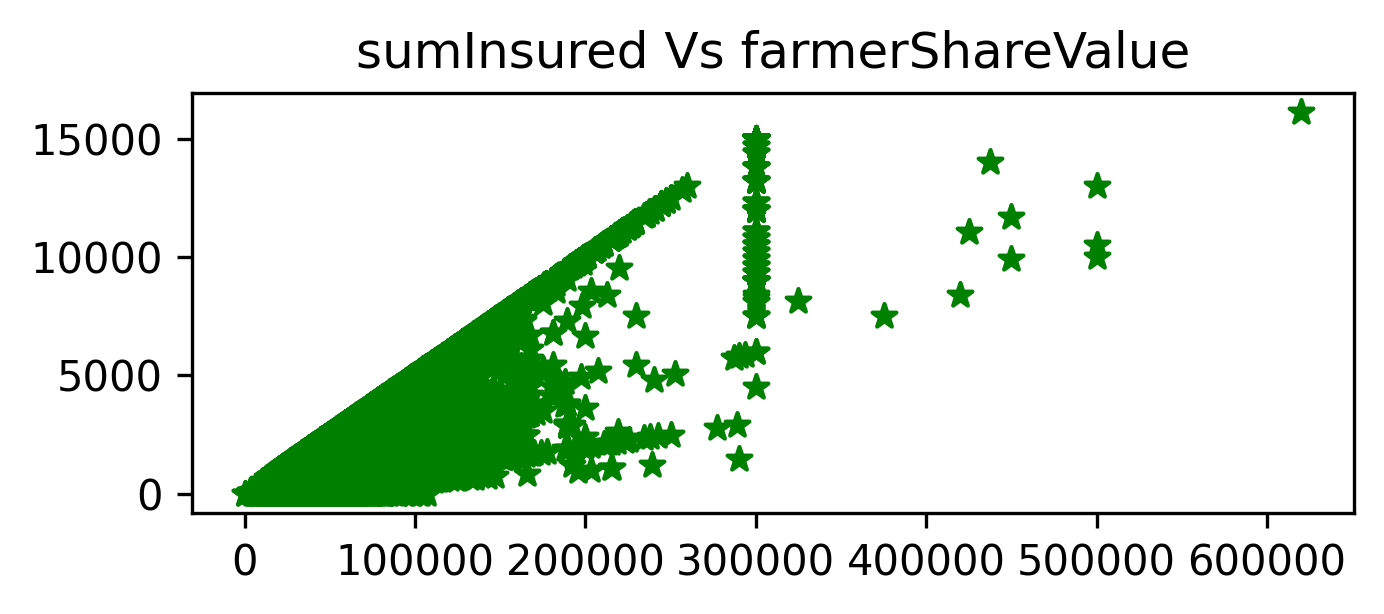

In [151]:
plt.figure(figsize=(5,4),dpi=300)
plt.subplot(2,1,1)
plt.scatter(pmfby_no_duplicates.farmerShare,pmfby_no_duplicates.farmerShareValue, c='y',marker="*")
plt.title("farmerShare Vs farmerShareValue")

plt.figure(figsize=(5,4),dpi=300)
plt.subplot(2,1,2)
plt.scatter(pmfby_no_duplicates.sumInsured,pmfby_no_duplicates.farmerShareValue, c='g',marker="*")
plt.title("sumInsured Vs farmerShareValue")

# Scaling of numerical data

## Apply appropriate encoding techniques:
### Use One-Hot Encoding for nominal categories.

# Data Dictionary of Modified Data

* #### Year: Year in which the farmer joined the scheme.
* #### State: 
* #### sumInsured: This is the total value of the crop that is insured against potential losses.	
* #### premiumRate: 
* #### farmerShare : This is the percentage of the sum insured that the farmer (and potentially the government) needs to pay as a premium for the insurance coverage.
For example:
If the sumInsured is 37,500 rupees and the farmerShare is 2%, then the total premium(farmerShareValue) would be, 37500 * 0.02 = Rs. 750

* #### stateShare: This is the percentage of the sum insured that the state needs to pay as a premium for the insurance coverage.
For example:
If the sumInsured is 89,903 rupees and the stateShare is 3.5%, then the stateShareValue would be, 89903 * 0.035 = Rs. 3146.605

* #### goiShare: This is the percentage of the sum insured that the Government of India needs to pay as a premium for the insurance coverage.

* #### seasonCode:
* #### schemeCode:
* #### stateCode:
* #### startDate:
* #### endDate:
* #### isOpen:
* #### cnStarted: Commensement year started
* #### isPreviousSeasonYearInSubsidy: Yes/No
* #### firstGoiSubsidy: Yes/No
* #### ayTy: Agricultural year type
* #### categoryName: 14 categories
* #### cropType: 2 Types, 1.Agriculture 2. Horticulture and commercial
* #### unit:
* #### cropTypeCode: 
* #### indemnityLevel: Indemnity Level refers to the percentage of the sum insured that farmers are eligible to receive as compensation in case of crop loss due to insured perils.
Three Levels: Typically, there are three indemnity levels: 70%, 80%, and 90%. The specific level may vary depending on the crop and risk factors in a particular region.
Threshold Yield: The indemnity level is linked to the Threshold Yield (TY), which is the benchmark yield level set for a crop in an insurance unit.
Compensation: Farmers are eligible for compensation when the actual yield falls below the Threshold Yield. The amount of compensation is determined based on the extent of the yield shortfall and the applicable indemnity level.

Example:
If the Indemnity Level for a particular crop is 80% and the sum insured is ₹100,000, farmers can receive a maximum compensation of ₹80,000 in case of crop loss.
* ####  farmerShare:
* #### farmerShareValue:
* #### goiShareValue:
* #### stateShareValue:
* #### scheme:
* #### insuranceCompany.insuranceCompanyCode:
* #### insuranceCompany.insuranceCompanyName: